In [346]:
#import libraries
import sys
from os.path import dirname, join as pjoin
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.linalg as la
np.set_printoptions(threshold=1000)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [311]:
#load usps data into arr
usps_data_dir= "usps_all.mat"
usps_data = sio.loadmat(usps_data_dir)
arr = usps_data['fea']
labels = usps_data['gnd']
arr.shape

(9298, 256)

In [312]:
# Split-out dataset into training and validation
X = arr[:,0:255]
y = labels[:,0]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=2007, random_state=1)

In [369]:
#train the test data using decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,max_features=255)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=255)

In [370]:
#Predicting labels on the test set for the decison tree.
y_pred =  clf.predict(X_validation)

In [375]:
#Evaluate Predictions using Accuracy Score and Confusion Matrix
print('Confusion Matrix: \n', confusion_matrix(Y_validation, y_pred))
print('\n')
mcm = multilabel_confusion_matrix(Y_validation, y_pred)
worst_digit =-1
worst_accuracy = -1
for i in range(0,10):
    digit_accuracy = (mcm[i][0][0] +mcm[i][1][1])/(mcm[i][0][0]+ mcm[i][0][1]+mcm[i][1][0] +mcm[i][1][1])
    if worst_accuracy ==-1 or digit_accuracy< worst_accuracy:
        worst_digit=i
        worst_accuracy = digit_accuracy
    print('accuracy for digit '  , i , ': ' , digit_accuracy)
    
print('\nDigit with worst accuracy is', worst_digit, 'It has an accuracy score of: ', worst_accuracy)
#print(' Matrix: \n',)
print('\nAccuracy Score on the Test Data: ',accuracy_score(Y_validation, y_pred))
print('\nPrecision Score on the Test Data: ',precision_score(Y_validation, y_pred, average='macro'))
print('\nRecall Score on the Test Data: ',recall_score(Y_validation, y_pred, average='macro'))

Confusion Matrix: 
 [[290   0   1  15   1   5   6   0  19   1]
 [  0 262   0   0   1   0   4   3   1   4]
 [  8   0 145   9   6   4   7   0  23   0]
 [  9   0   4 144   1  16   0   0  13   4]
 [  1   2   6   0 131   1   3   2   8  17]
 [  9   1  15  15   2 107   9   0   9   1]
 [  3   0   8   1   0   3 132   0   9   0]
 [  2   0  14   0   9   0   1 143   2  12]
 [  0   0   6  26   7   3   2   1  76  35]
 [  0   2   1   1  10   0   0   5   1 147]]


accuracy for digit  0 :  0.9601395117090185
accuracy for digit  1 :  0.9910313901345291
accuracy for digit  2 :  0.9441953163926258
accuracy for digit  3 :  0.9431988041853513
accuracy for digit  4 :  0.9616342800199302
accuracy for digit  5 :  0.953662182361734
accuracy for digit  6 :  0.9720976581963129
accuracy for digit  7 :  0.9745889387144993
accuracy for digit  8 :  0.9177877428998505
accuracy for digit  9 :  0.9531639262580966

digit with worst accuracy  8  accuracy score:  0.9177877428998505

Accuracy Score on the Test Data:  0.7857

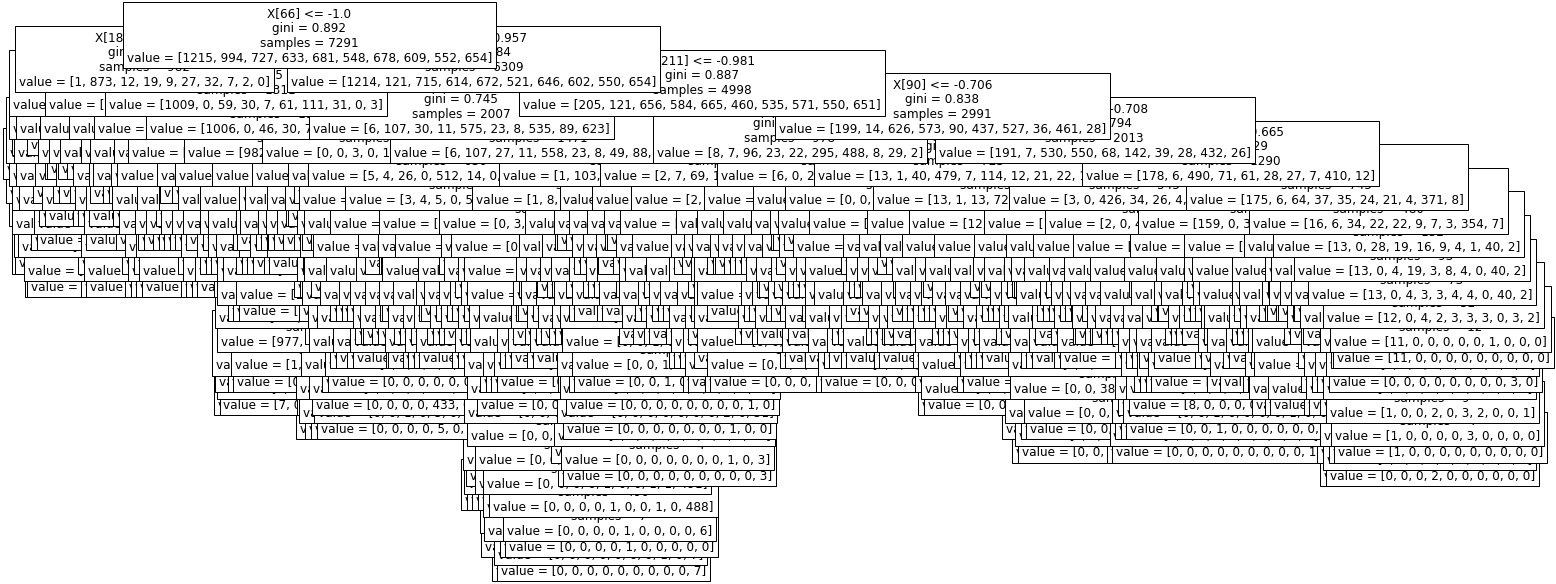

In [337]:
#showing the tree structure
plt.figure(figsize=(24,10))
tree.plot_tree(clf, fontsize=12)
plt.show()

In [317]:
#Text representation of the tree to show the entire tree structure
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_195 <= -0.99
|   |--- feature_44 <= -0.99
|   |   |--- class: 2
|   |--- feature_44 >  -0.99
|   |   |--- class: 10
|--- feature_195 >  -0.99
|   |--- feature_151 <= -0.96
|   |   |--- class: 1
|   |--- feature_151 >  -0.96
|   |   |--- class: 3



In [318]:
#Train the test data using K-nearest neighbor
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [319]:
#Predicting labels on the test set.
y_pred =  neigh.predict(X_validation)

In [320]:
#Evaluate Predictions using Accuracy Score and Confusion Matrix
print('Confusion Matrix: \n', confusion_matrix(Y_validation, y_pred))
print('\nAccuracy Score on the Test Data: ',accuracy_score(Y_validation, y_pred))
print('\nPrecision Score on the Test Data: ',precision_score(Y_validation, y_pred, average='macro'))
print('\nRecall Score on the Test Data: ',recall_score(Y_validation, y_pred, average='macro'))

Confusion Matrix: 
 [[335   0   0   2   0   0   0   0   0   1]
 [  0 273   0   0   1   0   1   0   0   0]
 [  2   0 198   0   0   0   1   1   0   0]
 [  0   0   1 183   0   5   0   0   1   1]
 [  1   0   1   0 160   0   1   1   0   7]
 [  2   0   1   0   0 162   0   0   2   1]
 [  1   0   1   0   0   0 154   0   0   0]
 [  0   2   0   0   1   0   0 177   1   2]
 [  0   1   1   2   0   2   0   1 148   1]
 [  0   0   0   0   1   0   0   0   0 166]]

Accuracy Score on the Test Data:  0.9745889387144993

Precision Score on the Test Data:  0.9730972749623442

Recall Score on the Test Data:  0.9719245491735391


In [321]:
#Train the test data using Support Vector Machine
clm = SVC()
clm.fit(X, y)

SVC()

In [322]:
#Predicting labels on the test set.
y_pred =  clm.predict(X_validation)

In [323]:
#Evaluate Predictions using Accuracy Score and Confusion Matrix
print('Confusion Matrix: \n', confusion_matrix(Y_validation, y_pred))
print('\nAccuracy Score on the Test Data: ',accuracy_score(Y_validation, y_pred))
print('\nPrecision Score on the Test Data: ',precision_score(Y_validation, y_pred, average='macro'))
print('\nRecall Score on the Test Data: ',recall_score(Y_validation, y_pred, average='macro'))

Confusion Matrix: 
 [[335   0   1   1   0   0   0   0   1   0]
 [  0 272   0   0   1   0   2   0   0   0]
 [  0   0 202   0   0   0   0   0   0   0]
 [  0   0   1 184   0   3   0   0   3   0]
 [  0   0   0   0 169   0   1   0   0   1]
 [  0   0   0   0   1 166   0   0   1   0]
 [  0   0   1   0   0   0 155   0   0   0]
 [  0   0   0   0   1   0   0 180   0   2]
 [  0   1   0   1   0   1   0   1 152   0]
 [  0   0   0   0   0   0   0   1   0 166]]

Accuracy Score on the Test Data:  0.987045341305431

Precision Score on the Test Data:  0.9850403923784601

Recall Score on the Test Data:  0.9865532537822415
